## Assignment 1 
### Suhirtha Ravindran a1903155

### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Reading datasets

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### 1.1 Check data type of df and analysing df

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

### 2. Exploratory Data Analysis and Data Preparation

#### 2.1 Visualising the data

##### 2.1.1 Distribution of Outcome over number of instances

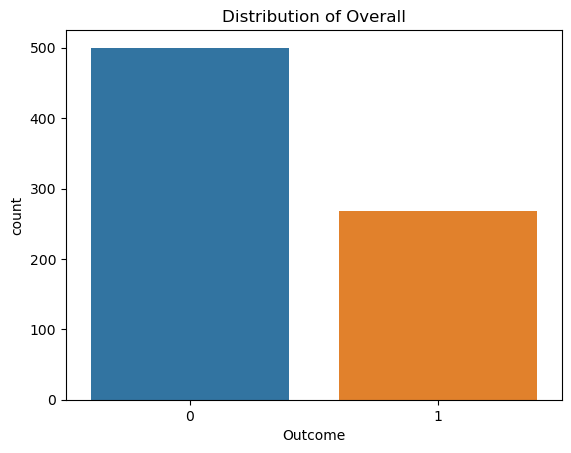

In [6]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Overall")
plt.show()

##### 2.1.2 Average Insulin Levels by Outcome

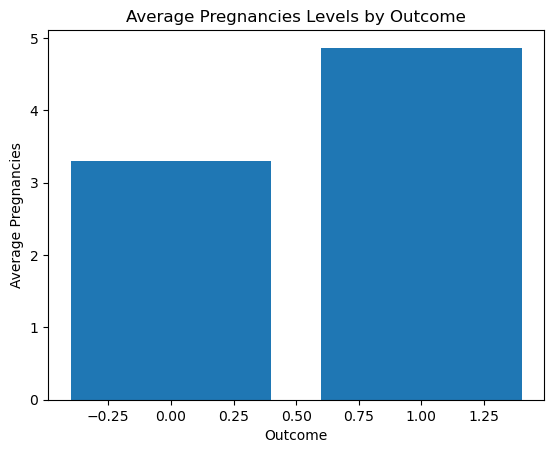

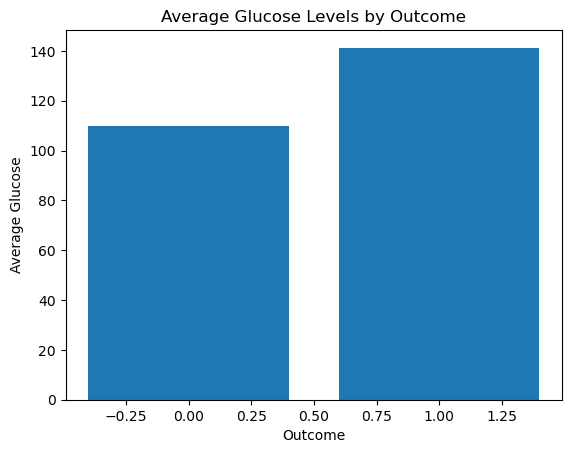

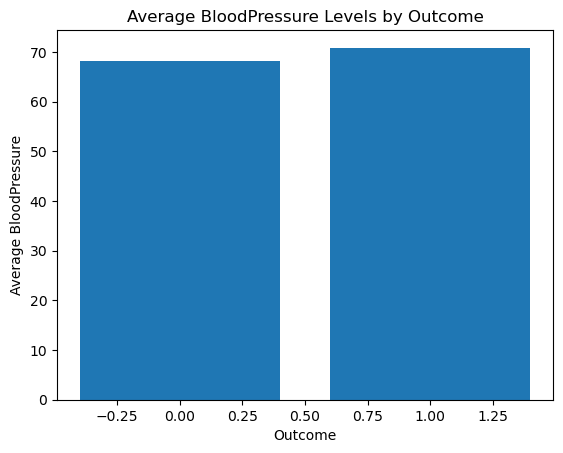

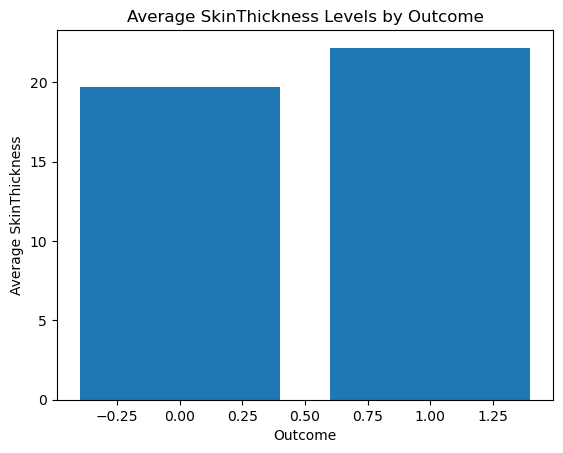

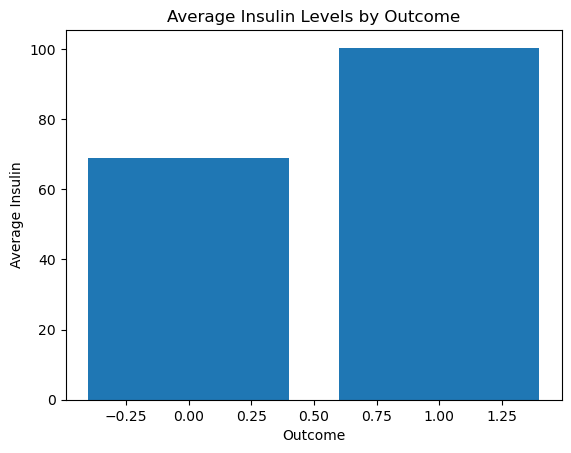

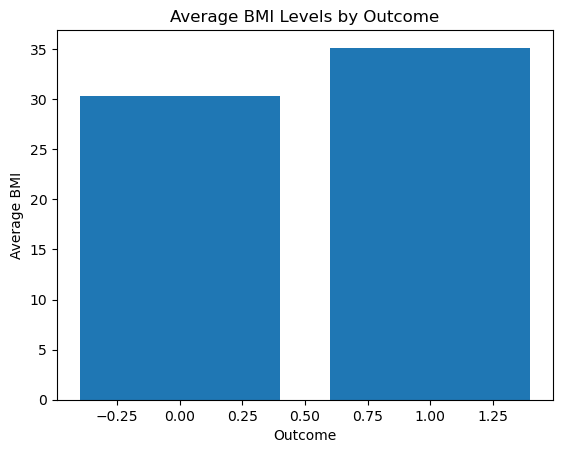

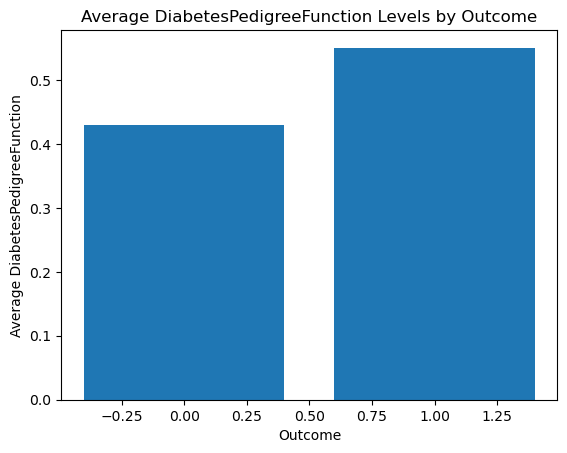

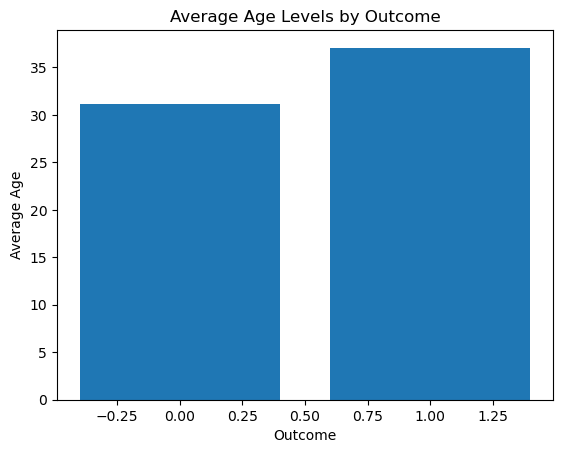

In [7]:
for i in df.columns[:-1]:
    grouped_data = df.groupby("Outcome")[i].mean()
    plt.bar(x=grouped_data.index, height=grouped_data.values)
    plt.xlabel("Outcome")
    plt.ylabel("Average "+i)
    plt.title("Average "+i+" Levels by Outcome")
    plt.show()

More visualisation of the dataset is performed in the following section

#### 2.2 Checking for invalid values and handling them

##### 2.2.1 Checking for null values

In [8]:
print("Number of missing values:")
print(df.isnull().sum()) 

Number of missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no null values in the given dataset

##### 2.2.2 Finding minimum and maximum values to find the approximate range of values present in each column

In [9]:
for i in df.columns:
    print(i,"min :",min(df[i]))
    print(i,"max :",max(df[i]))

Pregnancies min : 0
Pregnancies max : 17
Glucose min : 0
Glucose max : 199
BloodPressure min : 0
BloodPressure max : 122
SkinThickness min : 0
SkinThickness max : 99
Insulin min : 0
Insulin max : 846
BMI min : 0.0
BMI max : 67.1
DiabetesPedigreeFunction min : 0.078
DiabetesPedigreeFunction max : 2.42
Age min : 21
Age max : 81
Outcome min : 0
Outcome max : 1


##### 2.2.3 Visualising the distribution of values in each column using Histogram

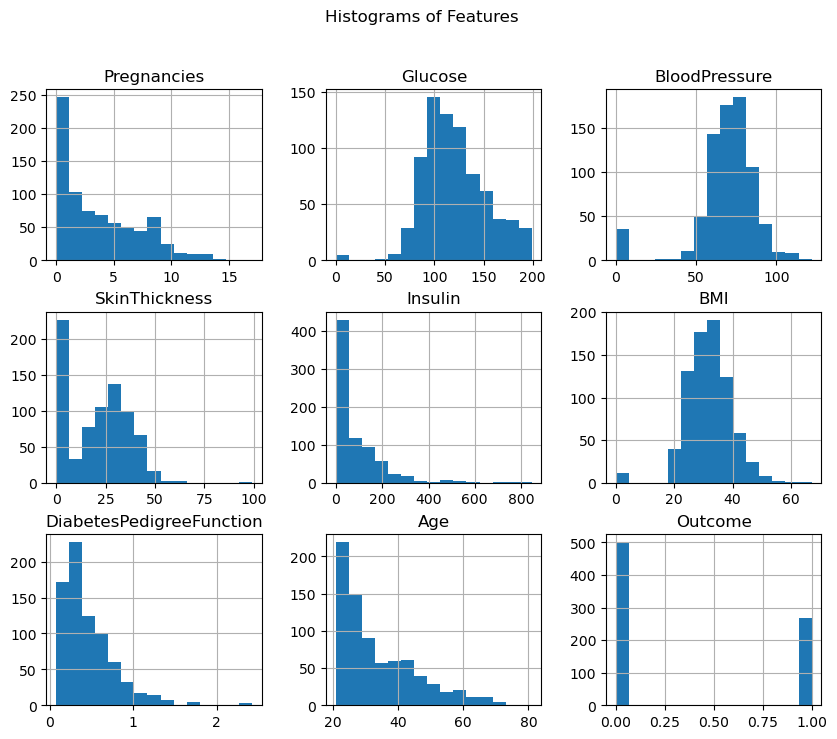

In [10]:
df.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()

* All the histogram plots show that the given dataset is skewed (mostly right-skewed)
* So, median imputation is preferred

##### 2.2.4 Visualising each column to find the outliers using Boxplot

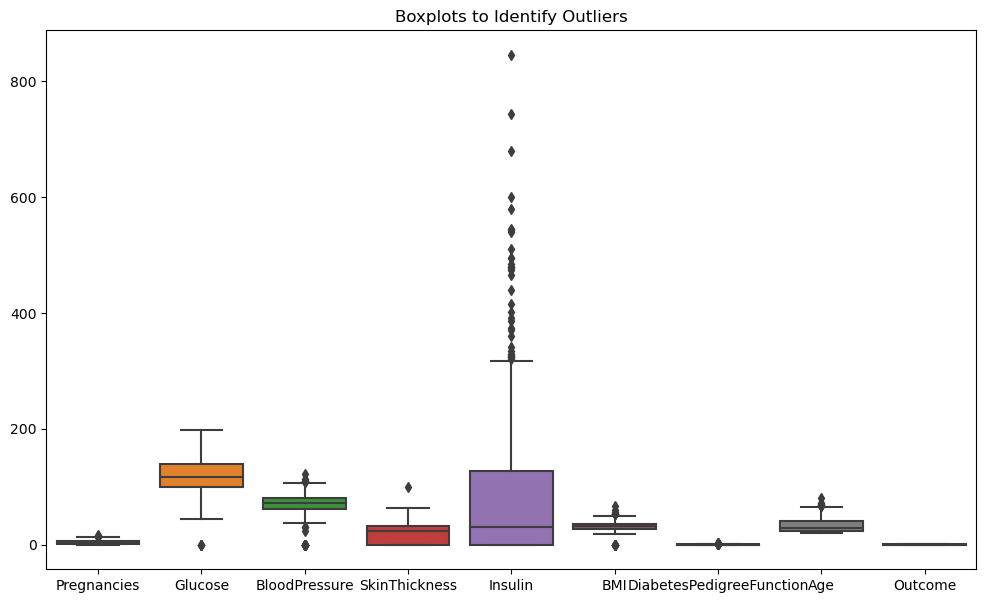

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df)
plt.title("Boxplots to Identify Outliers")
plt.show()

* Some of the columns (Glucose, BloodPressure, SkinThickness, Insulin and BMI) have 0 in it which is not possible. We can impute these values with their median
* Triceps Skin Thickness can be atmost in 60s. So, we can remove the row with the value 99
* Insulin value may reach 400~500 in extremely rare situation but any value above this is not possible. So, we can remove these values
* Other columns seem to have their values within the stipulated range of possible values except for the zeros in the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI
* We can preserve the other outliers as their original values itself

##### 2.2.5 Imputation of missing values using median

In [12]:
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for i in zero_cols:
    df[i] = df[i].replace(0,df[i].median())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


<ins> Checking imputation of missing values </ins>

In [13]:
for i in df.columns:
    print(i,"min :",min(df[i]))
    print(i,"max :",max(df[i]))

Pregnancies min : 0
Pregnancies max : 17
Glucose min : 44
Glucose max : 199
BloodPressure min : 24
BloodPressure max : 122
SkinThickness min : 7
SkinThickness max : 99
Insulin min : 14.0
Insulin max : 846.0
BMI min : 18.2
BMI max : 67.1
DiabetesPedigreeFunction min : 0.078
DiabetesPedigreeFunction max : 2.42
Age min : 21
Age max : 81
Outcome min : 0
Outcome max : 1


The dataset's missing values are thus imputed using the median value

##### 2.2.6 Removing the impossible values of the dataset

In [14]:
# Triceps Skin Thickness can be atmost in 60s. So, removing the row with the value 99
df = df[df["SkinThickness"]!=99]

# Insulin value may reach 400~500 in extremely rare situation so any value above this is removed
df = df[df["Insulin"]<=500]

# Display data
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


#### 2.3 Visualising the dataset after handling the missing and invalid values

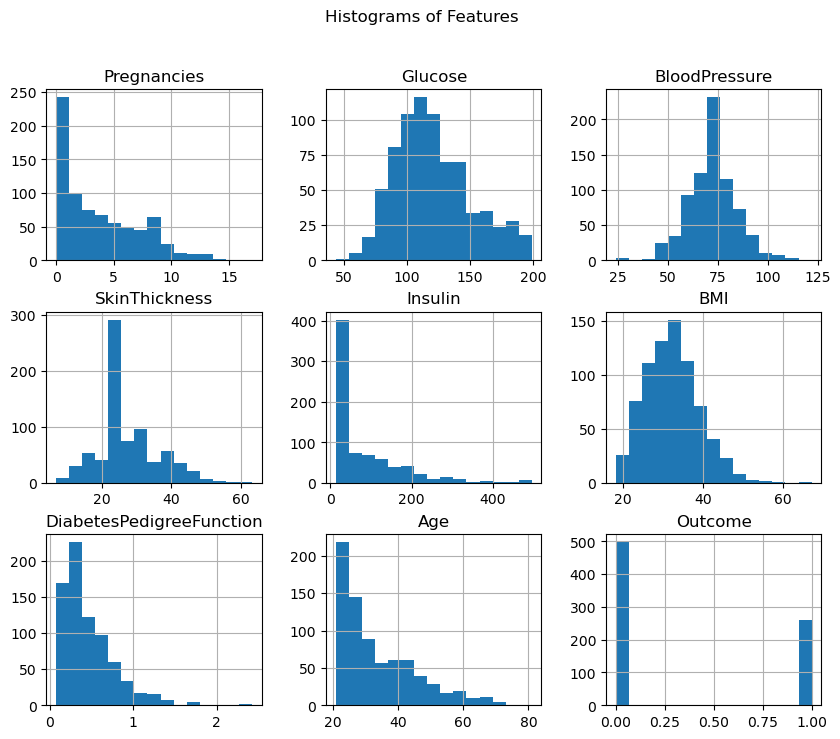

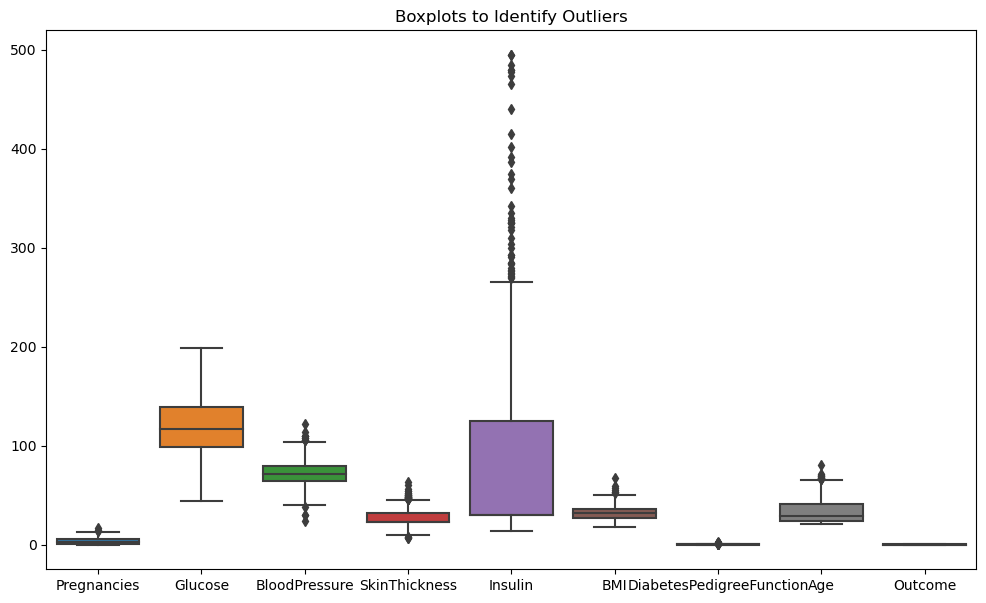

In [15]:
# Visualising the distribution of values in each column using Histogram
df.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()

# Visualising each column to find the outliers using Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df)
plt.title("Boxplots to Identify Outliers")
plt.show()

#### 2.4 Splitting the dataset

<ins>Splitting the given dataset into train and test datasets using 80-20 train-test split</ins>

In [16]:
X = df.drop(columns="Outcome")
y = df["Outcome"]
d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(X, y, test_size=0.2, random_state=100)

<ins>Train data</ins>

In [17]:
print(d_X_train.shape)
d_X_train

(606, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
559,11,85,74,23,30.5,30.1,0.300,35
281,10,129,76,28,122.0,35.9,0.280,39
556,1,97,70,40,30.5,38.1,0.218,30
106,1,96,122,23,30.5,22.4,0.207,27
509,8,120,78,23,30.5,25.0,0.409,64
...,...,...,...,...,...,...,...,...
586,8,143,66,23,30.5,34.9,0.129,41
55,1,73,50,10,30.5,23.0,0.248,21
355,9,165,88,23,30.5,30.4,0.302,49
81,2,74,72,23,30.5,32.0,0.102,22


In [18]:
print(d_y_train.shape)
d_y_train

(606,)


559    0
281    0
556    0
106    0
509    0
      ..
586    1
55     0
355    1
81     0
526    0
Name: Outcome, Length: 606, dtype: int64

<ins>Test data</ins>

In [19]:
print(d_X_test.shape)
d_X_test

(152, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
696,3,169,74,19,125.0,29.9,0.268,31
389,3,100,68,23,81.0,31.6,0.949,28
424,8,151,78,32,210.0,42.9,0.516,36
487,0,173,78,32,265.0,46.5,1.159,58
116,5,124,74,23,30.5,34.0,0.220,38
...,...,...,...,...,...,...,...,...
126,3,120,70,30,135.0,42.9,0.452,30
61,8,133,72,23,30.5,32.9,0.270,39
561,0,198,66,32,274.0,41.3,0.502,28
44,7,159,64,23,30.5,27.4,0.294,40


In [20]:
print(d_y_test.shape)
d_y_test

(152,)


696    1
389    0
424    1
487    0
116    1
      ..
126    0
61     1
561    1
44     0
711    0
Name: Outcome, Length: 152, dtype: int64

#### 2.5 Scaling

* We can use the StandardScaler from sklearn package to scale the dataset to transform the distribution from skewed to being normal
* Scaling is done after splitting the dataset to avoid data leakage

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [22]:
scaler = StandardScaler()
scaler.fit(d_X_train)
d_X_train_scaled = scaler.transform(d_X_train)
d_X_test_scaled = scaler.transform(d_X_test)

In [23]:
d_X_train_sc = pd.DataFrame(d_X_train_scaled, columns = d_X_train.columns)
d_X_train_sc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.162077,-1.175415,0.106466,-0.480258,-0.644523,-0.338324,-0.500469,0.148981
1,1.859626,0.336100,0.270845,0.088839,0.422017,0.550821,-0.561436,0.488708
2,-0.862435,-0.763184,-0.222291,1.454672,-0.644523,0.888083,-0.750436,-0.275678
3,-0.862435,-0.797536,4.051555,-0.480258,-0.644523,-1.518742,-0.783968,-0.530473
4,1.254723,0.026927,0.435224,-0.480258,-0.644523,-1.120159,-0.168194,2.612001
...,...,...,...,...,...,...,...,...
601,1.254723,0.817037,-0.551048,-0.480258,-0.644523,0.397520,-1.021743,0.658571
602,-0.862435,-1.587647,-1.866078,-1.959910,-0.644523,-1.426761,-0.658985,-1.040063
603,1.557175,1.572795,1.257117,-0.480258,-0.644523,-0.292334,-0.494372,1.338025
604,-0.559984,-1.553294,-0.057912,-0.480258,-0.644523,-0.047053,-1.104049,-0.955131


In [24]:
d_X_test_sc = pd.DataFrame(d_X_test_scaled, columns = d_X_test.columns)
d_X_test_sc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.257533,1.710205,0.106466,-0.935536,0.456985,-0.368985,-0.598017,-0.190746
1,-0.257533,-0.660126,-0.386670,-0.480258,-0.055886,-0.108373,1.477934,-0.445541
2,1.254723,1.091858,0.435224,0.544117,1.447760,1.623927,0.157983,0.233913
3,-1.164886,1.847615,0.435224,0.544117,2.088849,2.175810,2.118095,2.102410
4,0.347370,0.164337,0.106466,-0.480258,-0.644523,0.259549,-0.744339,0.403776
...,...,...,...,...,...,...,...,...
147,-0.257533,0.026927,-0.222291,0.316478,0.573547,1.623927,-0.037114,-0.275678
148,1.254723,0.473511,-0.057912,-0.480258,-0.644523,0.090918,-0.591920,0.488708
149,-1.164886,2.706431,-0.551048,0.544117,2.193754,1.378646,0.115305,-0.445541
150,0.952272,1.366679,-0.715427,-0.480258,-0.644523,-0.752237,-0.518759,0.573639


##### 2.5.1 Visualising the split data after scaling

<ins>Train data</ins>

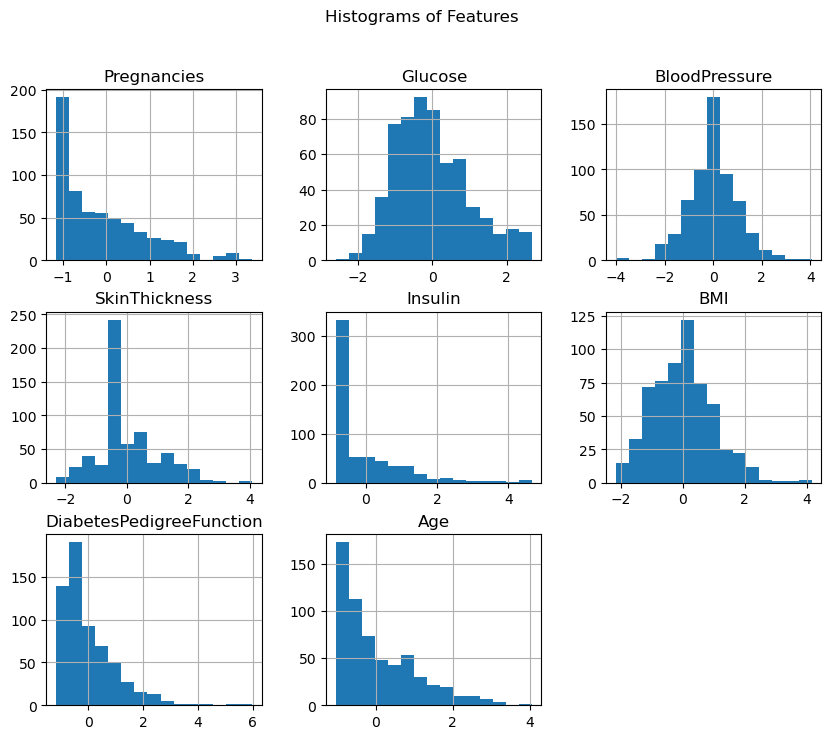

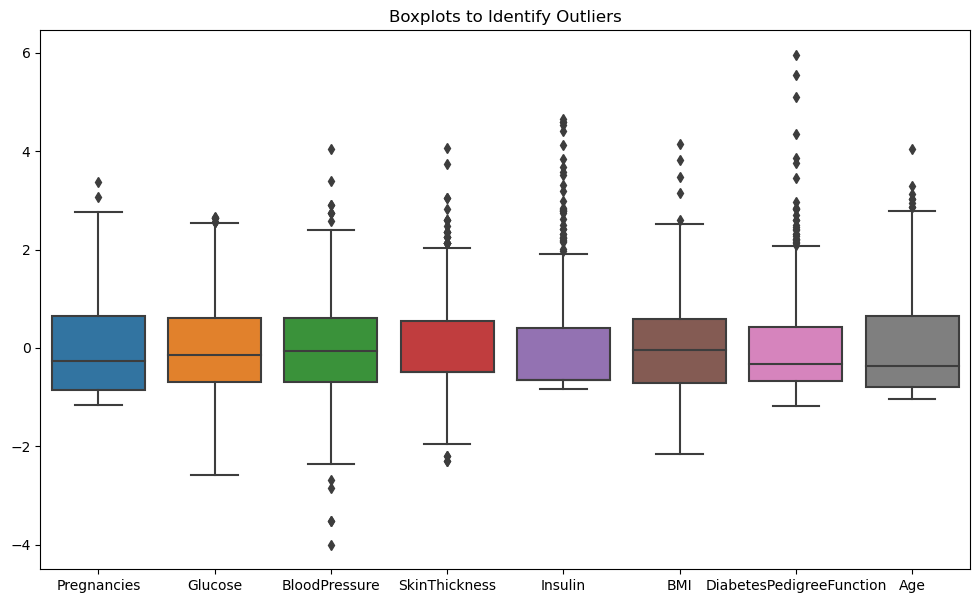

In [25]:
# Visualising the distribution of values in each column using Histogram
d_X_train_sc.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()

# Visualising each column to find the outliers using Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=d_X_train_sc)
plt.title("Boxplots to Identify Outliers")
plt.show()

<ins>Test data</ins>

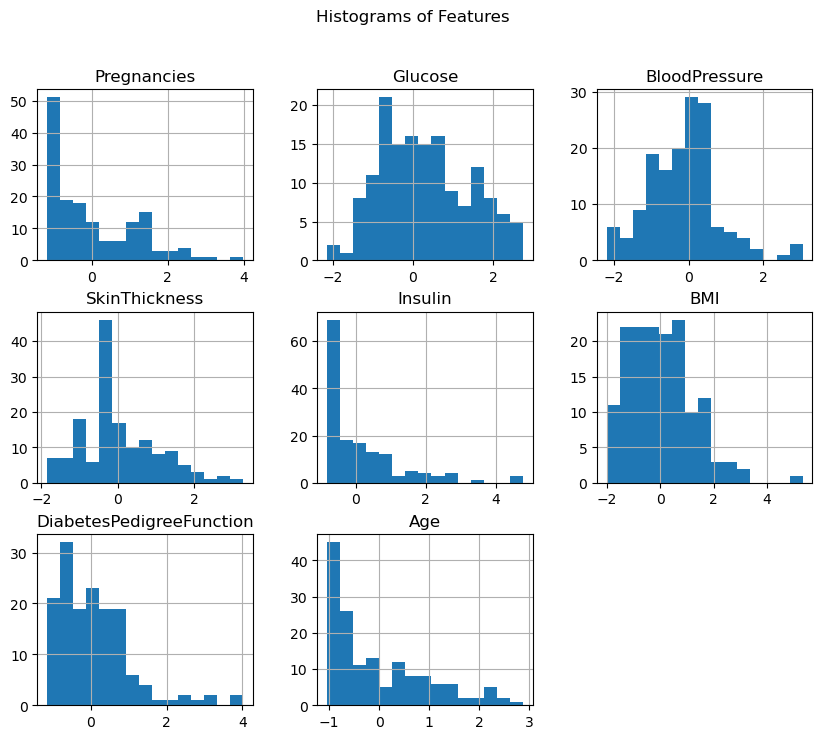

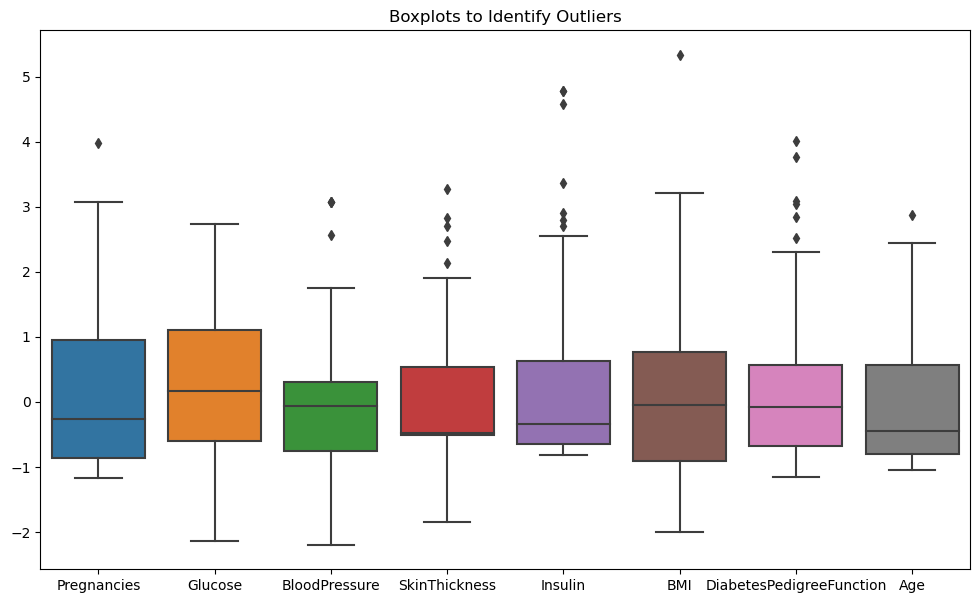

In [26]:
# Visualising the distribution of values in each column using Histogram
d_X_test_sc.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()

# Visualising each column to find the outliers using Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=d_X_test_sc)
plt.title("Boxplots to Identify Outliers")
plt.show()

The train and test data are scaled using standard scaler. Some skewed columns are normalised.

### 3. Single-Layer Perceptron

#### 3.1 Model

In [27]:
# To ensure reproducibility of the output, the seed is set to be 53
np.random.seed(53)

# Sigmoid function (activation)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Binary Cross-Entropy Loss
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Initialize weights and biases
def initialize_weights(n_inputs):
    weights = np.random.randn(n_inputs)  # Random weights
    bias = np.random.randn()  # Random bias
    return weights, bias

# Perceptron forward pass
def forward(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output)

# Training the perceptron
def train_perceptron(X_train, y_train, epochs=1000, learning_rate=0.1):
    n_samples, n_features = X_train.shape
    weights, bias = initialize_weights(n_features)

    for epoch in range(epochs):
        # Forward pass
        y_pred = forward(X_train, weights, bias)

        # Calculate the loss
        loss = binary_crossentropy_loss(y_train, y_pred)

        # Calculate gradients (for gradient descent)
        error = y_pred - y_train.values  # difference between prediction and actual
        dw = np.dot(X_train.T, error * sigmoid_derivative(y_pred)) / n_samples  # weight gradient
        db = np.sum(error * sigmoid_derivative(y_pred)) / n_samples  # bias gradient

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return weights, bias

# Make predictions
def predict(X, weights, bias):
    y_pred = forward(X, weights, bias)
    return [1 if i > 0.5 else 0 for i in y_pred]  # Classify as 1 if sigmoid output > 0.5

# Train the perceptron with the training data
weights, bias = train_perceptron(d_X_train_sc, d_y_train, epochs=1000, learning_rate=0.1)

# Make predictions on the test set
y_pred = predict(d_X_test_sc, weights, bias)

Epoch 0, Loss: 0.8642
Epoch 100, Loss: 0.8125
Epoch 200, Loss: 0.7731
Epoch 300, Loss: 0.7428
Epoch 400, Loss: 0.7194
Epoch 500, Loss: 0.7007
Epoch 600, Loss: 0.6853
Epoch 700, Loss: 0.6721
Epoch 800, Loss: 0.6604
Epoch 900, Loss: 0.6497


#### 3.2 Evaluation metrics

In [28]:
accuracy = accuracy_score(d_y_test, y_pred)
precision = precision_score(d_y_test, y_pred)
recall = recall_score(d_y_test, y_pred)
f1 = f1_score(d_y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.82
Precision: 0.72
Recall: 0.81
F1 Score: 0.77


     Actual  Predicted
696       1          1
389       0          0
424       1          1
487       0          1
116       1          0
215       1          1
350       0          0
203       0          0
275       0          0
158       0          0


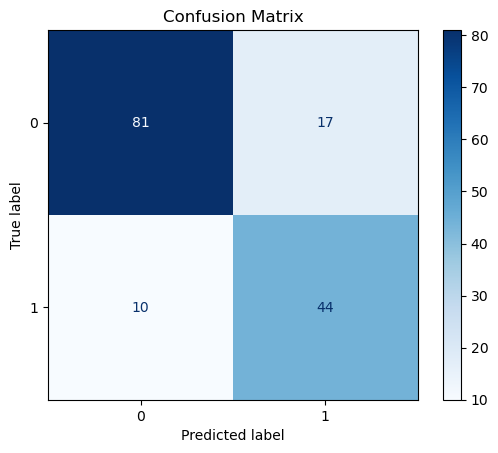

In [29]:
# Show predicted vs actual values
predicted_vs_actual = pd.DataFrame({
    'Actual': d_y_test,
    'Predicted': y_pred
})
print(predicted_vs_actual.head(10))  # Display the first 10 predictions

# Generate and display confusion matrix
cm = confusion_matrix(d_y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### 3.3 Using PyTorch
Based on Workshop codes

In [50]:
# To ensure reproducibility of the output, the seed is set to be 53
np.random.seed(53)

# Convert to PyTorch tensors
d_X_train_pyt = torch.FloatTensor(d_X_train_scaled)
d_y_train_pyt = torch.FloatTensor(d_y_train).view(-1, 1)  # Reshape for a single output

d_X_test_scaled = df.drop("Outcome", axis=1).values  # Replace with actual test data
d_y_test = df["Outcome"].values

d_X_test_pyt = torch.FloatTensor(d_X_test_scaled)
d_y_test_pyt = torch.FloatTensor(d_y_test).view(-1, 1)  # Reshape for a single output

# Define the Single Layer Perceptron model
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size):
        super(SingleLayerPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # One output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation for binary classification

# Initialize model, loss function and optimizer
input_size = d_X_train_scaled.shape[1]
model = SingleLayerPerceptron(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # Zero gradients
    outputs = model(d_X_train_pyt)  # Forward pass
    loss = criterion(outputs, d_y_train_pyt)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    y_pred = model(d_X_test_pyt)
    y_pred_classes = (y_pred > 0.5).float()  # Convert probabilities to binary predictions

Epoch [100/1000], Loss: -0.0000
Epoch [200/1000], Loss: -0.0000
Epoch [300/1000], Loss: -0.0000
Epoch [400/1000], Loss: -0.0000
Epoch [500/1000], Loss: -0.0000
Epoch [600/1000], Loss: -0.0000
Epoch [700/1000], Loss: -0.0000
Epoch [800/1000], Loss: -0.0000
Epoch [900/1000], Loss: -0.0000
Epoch [1000/1000], Loss: -0.0000


### 9. References

1. https://www.kaggle.com/discussions/general/262007#
2. https://stackoverflow.com/questions/59333630/re-sampling-inquiry
3. https://www.geeksforgeeks.org/pandas-how-to-shuffle-a-dataframe-rows/